<h1> PROJETO 3 ANÁLISE DE RISCO NO TRANSPORTE PÚBLICO </h1>

<h1> ELABORADO POR DANILO TEMERLOGLOU DE ABREU</h1>

<h3> CONCLUÍDO EM 05/12/2023 </h3>

In [1]:
#Cada problema foi resolvido de duas formas: query SQL e gráfico

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [3]:
#pip install sqldf -U


In [4]:
#pip install numpy -U

In [5]:
# Imports
import numpy as np
import pandas as pd
import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

matplotlib: 3.7.1
seaborn   : 0.12.2
numpy     : 1.23.5
pandas    : 1.3.4
sqldf     : 0.4.2



In [7]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [8]:
# Carrega os dados
df = pd.read_excel('TFL_Bus_Safety.xlsx')

In [9]:
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [10]:
df.sort_index(inplace = True)
df.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
18412,2018,2018-01-01,18,London United,London United,Park Royal,Brent,Injuries treated on scene,Personal Injury,Passenger,Female,Adult
11033,2016,2016-02-01,105,Metroline,Metroline,Garage Not Available,Ealing,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
14116,2017,2017-05-01,185,London Central,Go-Ahead,Camberwell,Lambeth,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Child
22466,2018,2018-08-01,259,Arriva London North,Arriva London,Tottenham,Haringey,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
20327,2018,2018-04-01,309,C T Plus,CT Plus,Hackney Ash Grove,Tower Hamlets,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Unknown


In [11]:
# Tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [12]:
# Atributo shape
df.shape

(23158, 12)

In [13]:
# Método info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [14]:
# Método describe()
df.describe()

,Year
count,23158.000000
mean,2016.449607
std,1.074073
min,2015.000000
25%,2016.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


In [15]:
# Método value_counts()
df.value_counts()

Year  Date Of Incident  Route  Operator             Group Name     Bus Garage                  Borough               Injury Result Description                    Incident Event Type  Victim Category  Victims Sex  Victims Age
2016  2016-11-01        52     Metroline            Metroline      Willesden                   Westminster           Injuries treated on scene                    Collision Incident   Passenger        Unknown      Unknown        13
2015  2015-06-01        275    East London          Stagecoach     Garage Not Available        Redbridge             Injuries treated on scene                    Collision Incident   Passenger        Female       Adult          10
2016  2016-11-01        211    Abellio London       Abellio        Battersea (Abellio London)  Kensington & Chelsea  Injuries treated on scene                    Collision Incident   Passenger        Female       Adult           7
2015  2015-08-01        W19    Blue Triangle Buses  Go-Ahead       Garage Not Avai

In [16]:
# Atributo size (total de registros considerando cada coluna)
df.size

277896

In [17]:
#renomeando as colunas. Elas não podem ter espaço nem acentuação
df.rename(columns={'Year': 'Ano'}, inplace = True)
df.rename(columns={'Date Of Incident': 'Data_Incidente'}, inplace = True)
df.rename(columns={'Route': 'Rota'}, inplace = True)
df.rename(columns={'Operator': 'Operador'}, inplace = True)
df.rename(columns={'Group Name': 'Nome_Grupo'}, inplace = True)
df.rename(columns={'Bus Garage': 'Garagem_Onibus'}, inplace = True)
df.rename(columns={'Borough': 'Bairro'}, inplace = True)
df.rename(columns={'Injury Result Description': 'Descricao_result_ferida'}, inplace = True)
df.rename(columns={'Incident Event Type': 'Tipo_Evento_Incidente'}, inplace = True)
df.rename(columns={'Victim Category': 'Categoria_Vitima'}, inplace = True)
df.rename(columns={'Victims Sex': 'Sexo_Vitima'}, inplace = True)
df.rename(columns={'Victims Age': 'Idade_Vitima'}, inplace = True)
df.head(5)

,Ano,Data_Incidente,Rota,Operador,Nome_Grupo,Garagem_Onibus,Bairro,Descricao_result_ferida,Tipo_Evento_Incidente,Categoria_Vitima,Sexo_Vitima,Idade_Vitima
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [18]:
df['Data_Incidente'] = pd.to_datetime(df['Data_Incidente'])
df['Mes'] = df['Data_Incidente'].dt.month
df.head(5)

,Ano,Data_Incidente,Rota,Operador,Nome_Grupo,Garagem_Onibus,Bairro,Descricao_result_ferida,Tipo_Evento_Incidente,Categoria_Vitima,Sexo_Vitima,Idade_Vitima,Mes
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1


<h1>PERGUNTA 1</h1>

In [19]:
# Pergunta 1- Qual a quantidade de incidentes por gênero?
# Resposta 1 VIA QUERY
query = """
SELECT Sexo_Vitima, count(*) AS Quantidade
FROM df
GROUP BY Sexo_Vitima
;
"""
df1=sqldf.run(query)
df1

,Sexo_Vitima,Quantidade
0,Female,11847
1,Male,7709
2,Unknown,3602


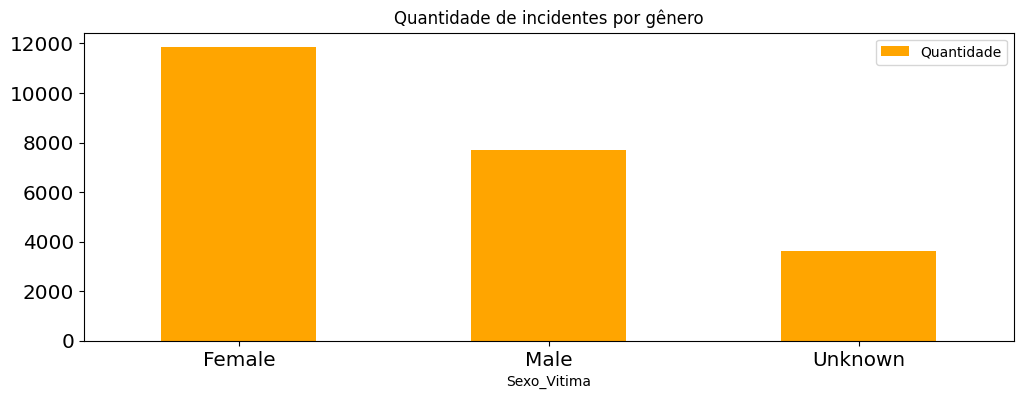

In [20]:
# Pergunta 1- Qual a quantidade de incidentes por gênero?
# Resposta 1 VIA GRÁFICO
df1.plot(x='Sexo_Vitima',kind='bar', color = 'Orange')
plt.title('Quantidade de incidentes por gênero')
plt.xticks(rotation=0)
plt.show()
#plt.title(r'$sigma_i=15$', fontsize=20)
#plt.bar(query[Sexo_Vitima], queryheight =3)
#plt.bar(df['Tipo_Evento_Incidente'], df['Sexo_Vitima'])
#plt.bar(, color = Red)
#plt.legend()
#plt.show()

In [21]:
# Pergunta 2- Qual faixa etária esteve mais envolvida nos incidentes?
# Resposta 2 VIA QUERY
# A faixa etária mais envolvida nos incidentes é a faixa adulta
query = """
SELECT Idade_Vitima AS Faixa_Etaria, count(*) AS Quantidade
FROM df
GROUP BY Idade_Vitima
ORDER BY count(*) DESC;
"""
df2 = sqldf.run(query)
df2

,Faixa_Etaria,Quantidade
0,Adult,10754
1,Unknown,7135
2,Elderly,2769
3,Child,2181
4,Youth,319


<h1>PERGUNTA 2</h1>

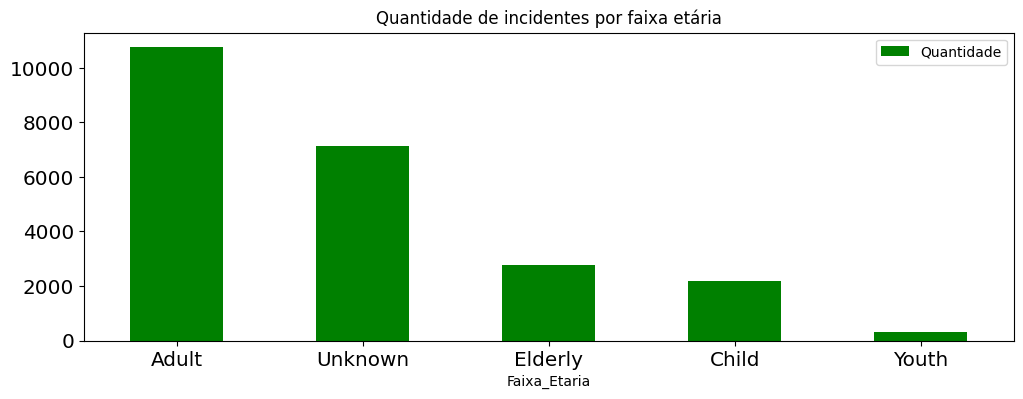

In [22]:
# Pergunta 2- Qual faixa etária esteve mais envolvida nos incidentes?
# Resposta 2 VIA GRÁFICO
#OK!
# A faixa etária mais envolvida nos incidentes é a faixa adulta
df2.plot(x='Faixa_Etaria',kind='bar', color = 'Green')
plt.title('Quantidade de incidentes por faixa etária')
plt.xticks(rotation=0)
plt.show()

<h1>PERGUNTA 3</h1>

In [23]:
# Pergunta 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
# Resposta 3 VIA QUERY
query = """
SELECT Tipo_Evento_Incidente, count(*) AS Quantidade, cast( 100. * count(*) / sum(count(*)) over () as decimal(10,2)) 
FROM df
GROUP BY Tipo_Evento_Incidente
ORDER BY count(*) DESC
;
"""
df3 = sqldf.run(query)
df3.rename(columns={'cast( 100. * count(*) / sum(count(*)) over () as decimal(10,2))': 'Porcentagem'}, inplace = True)
df3['Porcentagem'] = round (df3['Porcentagem'],2)
df3

,Tipo_Evento_Incidente,Quantidade,Porcentagem
0,Slip Trip Fall,6981,30.15
1,Onboard Injuries,6563,28.34
2,Personal Injury,4596,19.85
3,Collision Incident,4166,17.99
4,Assault,590,2.55
5,Activity Incident Event,114,0.49
6,Vandalism Hooliganism,73,0.32
7,Safety Critical Failure,66,0.28
8,Fire,6,0.03
9,Robbery,3,0.01


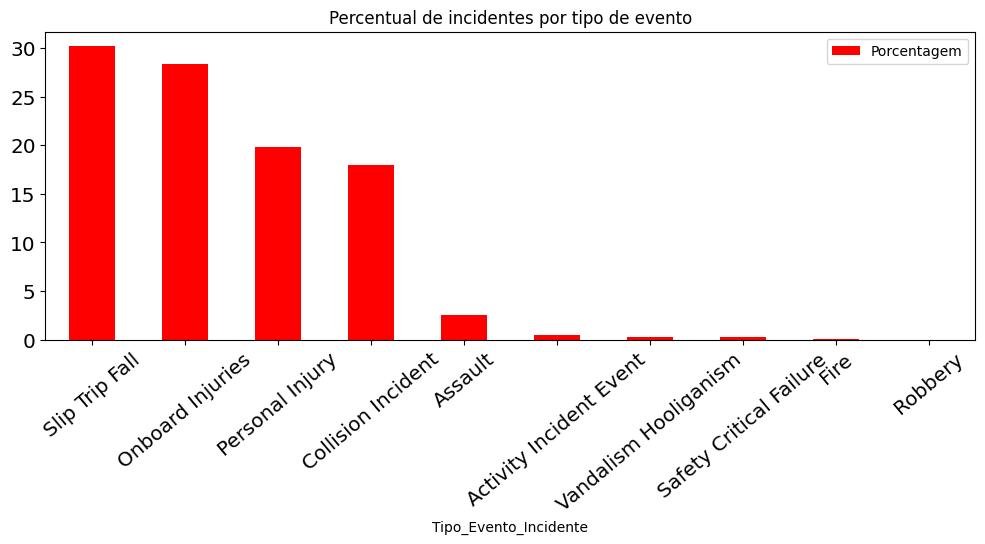

In [24]:
# Pergunta 3- Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
# Resposta 3 VIA GRÁFICO
#OK!
df3.plot(x ='Tipo_Evento_Incidente', y='Porcentagem', kind='bar', color ='Red')
plt.title('Percentual de incidentes por tipo de evento')
plt.xticks(rotation=40)
plt.show()

<h1>PERGUNTA 4</h1>

In [25]:
# Pergunta 4- Como foi a evolução de incidentes por mês ao longo do tempo?
# Resposta 4 VIA QUERY
query = """
SELECT Mes, count(*) AS Quantidade
FROM df
GROUP BY Mes
;
"""
df4 = sqldf.run(query)
df4

,Mes,Quantidade
0,1,1847
1,2,1849
2,3,2023
3,4,2044
4,5,2065
5,6,2097
6,7,2268
7,8,2013
8,9,2109
9,10,1642


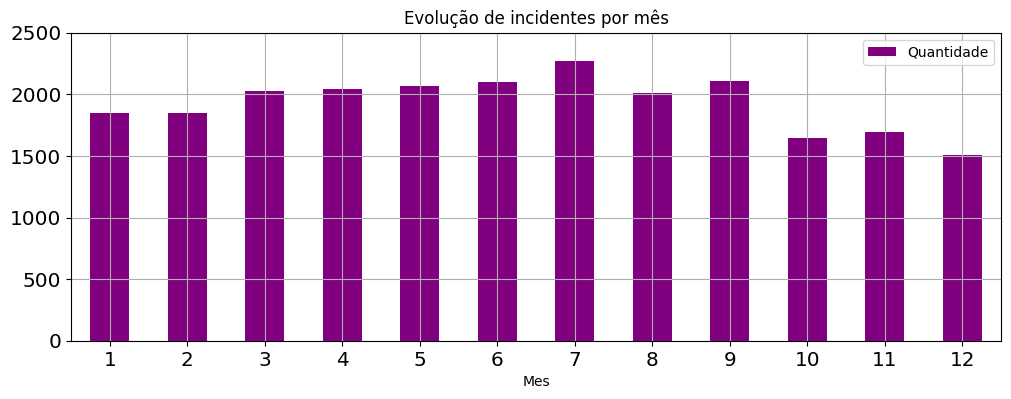

In [26]:
# Pergunta 4- Como foi a evolução de incidentes por mês ao longo do tempo?
# Resposta 4 VIA GRÁFICO
df4.plot(x='Mes',y='Quantidade', kind='bar', color = 'Purple')
plt.yticks(np.arange(0, 3000, step=500))
plt.xticks(rotation=0)
plt.title('Evolução de incidentes por mês')
plt.grid()
plt.show()

<h1>PERGUNTA 5</h1>

In [27]:
# Pergunta 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes 
#envolvendo pessoas do sexo feminino?
# Resposta 5 VIA QUERY
#Quando o incidente foi “Collision Incident”, no mês de Setembro ocorreu maior número de incidentes 
#envolvendo pessoas do sexo feminino
query = """
SELECT Mes, count(*) AS Quantidade
FROM df
WHERE Tipo_Evento_Incidente = 'Collision Incident' AND Sexo_Vitima = 'Female'
GROUP BY Mes
ORDER BY count(*) DESC
;
"""
df5 = sqldf.run(query)
df5

,Mes,Quantidade
0,9,158
1,6,150
2,7,147
3,4,147
4,11,140
5,1,137
6,3,129
7,5,123
8,8,122
9,2,116


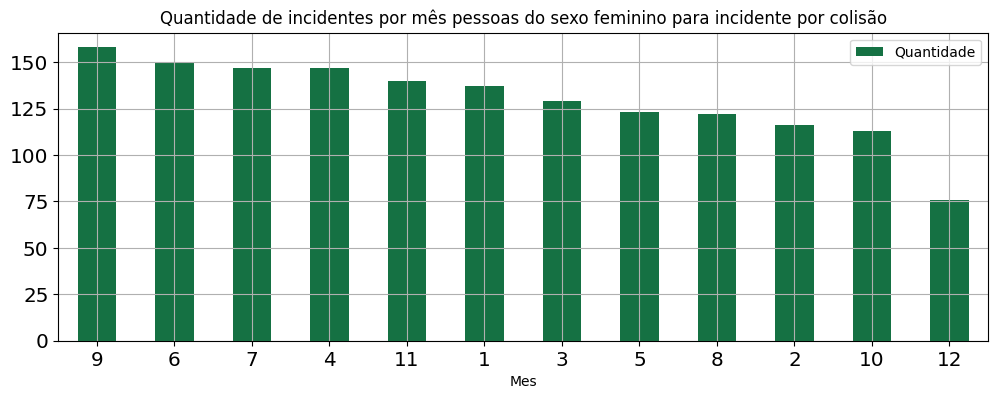

In [28]:
# Pergunta 5- Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes 
#envolvendo pessoas do sexo feminino?
# Resposta 5 VIA GRÁFICO
#Quando o incidente foi “Collision Incident”, no mês de Setembro ocorreu maior número de incidentes 
#envolvendo pessoas do sexo feminino
df5.plot(x ='Mes', y='Quantidade',kind='bar', color = '#157143')
plt.title('Quantidade de incidentes por mês pessoas do sexo feminino para incidente por colisão')
plt.xticks(rotation=0)
plt.grid()
plt.show()

<h1>PERGUNTA 6</h1>

In [29]:
# Pergunta 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?
# Resposta 6 VIA QUERY
query = """
SELECT Mes, count(*) as Media
FROM df
WHERE Idade_Vitima = 'Child'
GROUP BY Mes
;
"""
df6 = sqldf.run(query)
df6

,Mes,Media
0,1,126
1,2,146
2,3,190
3,4,226
4,5,206
5,6,245
6,7,232
7,8,208
8,9,225
9,10,150


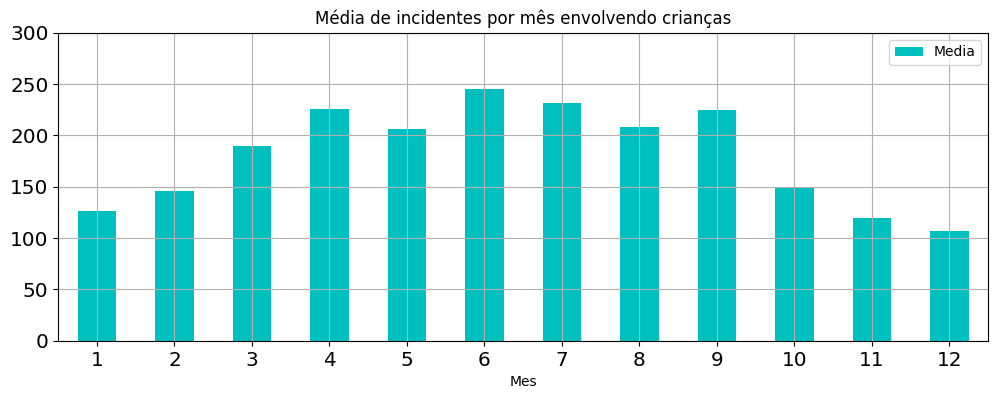

In [30]:
# Pergunta 6- Qual foi a média de incidentes por mês envolvendo crianças (Child)?
# Resposta 6 VIA GRAFICO
df6.plot(x ='Mes', y='Media',kind='bar', color = 'c')
plt.title('Média de incidentes por mês envolvendo crianças')
plt.yticks(np.arange(0, 350, step=50))
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [31]:
# Pergunta 7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), 
#qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
# Resposta 7 VIA QUERY
# Total de incidents com sexo feminino 8816 para incidente "Lesões tratadas no local"
# Total de incidents com sexo masculino 7709 para incidente "Lesões tratadas no local"
query = """
SELECT Sexo_Vitima, count(*) AS Quantidade
FROM df
WHERE Descricao_result_ferida = 'Injuries treated on scene' AND Sexo_Vitima = 'Female' OR Sexo_Vitima = 'Male'
GROUP BY Sexo_Vitima
ORDER BY count(*) DESC
;
"""
df7 = sqldf.run(query)
df7

,Sexo_Vitima,Quantidade
0,Female,8816
1,Male,7709


<h1>PERGUNTA 7</h1>

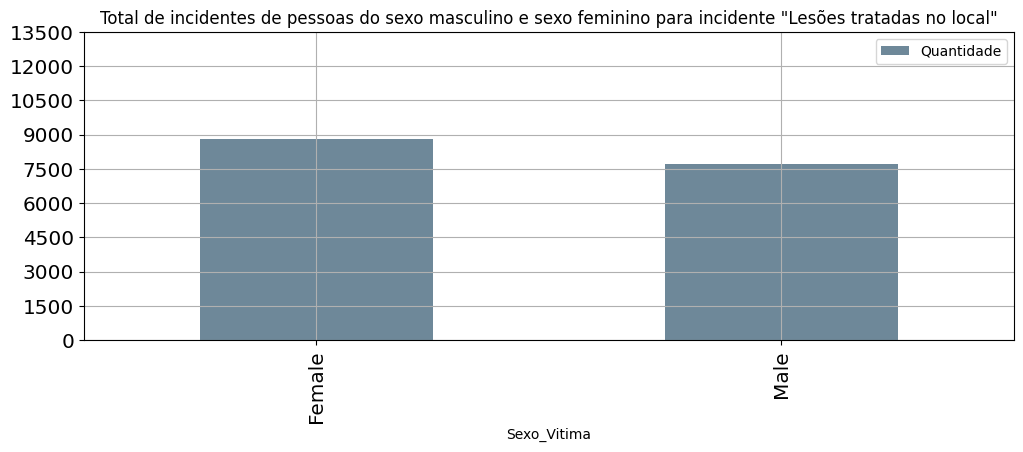

In [32]:
# Pergunta 7- Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), 
#qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
# Resposta 7 VIA GRAFICO
# Total de incidents com sexo feminino 8816 para incidente "Lesões tratadas no local"
# Total de incidents com sexo masculino 7709 para incidente "Lesões tratadas no local"
df7.plot(x='Sexo_Vitima',kind='bar', color = '#6e8899')
plt.title('Total de incidentes de pessoas do sexo masculino e sexo feminino para incidente "Lesões tratadas no local"')
plt.yticks(np.arange(0, 15000, step=1500))
plt.grid()
plt.show()

<h1>PERGUNTA 8</h1>

In [33]:
# Pergunta 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
# Resposta 8 VIA QUERY
#No ano de 2017, o mês de Julho teve mais incidentes com idosos
query = """
SELECT Mes, count(*) AS Quantidade
FROM df
WHERE Ano = '2017' AND Idade_Vitima = 'Elderly'
GROUP BY Mes
ORDER BY count(*) DESC
;
"""
df8 = sqldf.run(query)
df8

,Mes,Quantidade
0,7,81
1,9,78
2,3,77
3,4,75
4,8,70
5,10,69
6,5,69
7,11,68
8,12,67
9,1,66


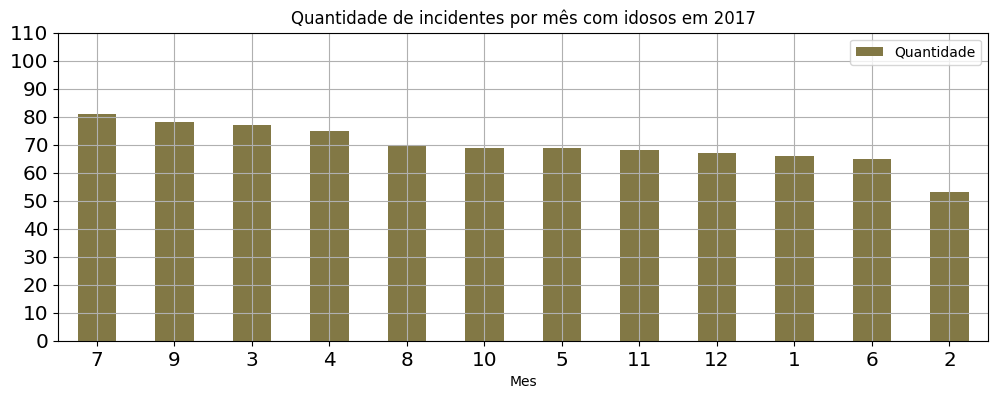

In [34]:
# Pergunta 8- No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
# Resposta 8 VIA GRAFICO
#No ano de 2017, o mês de Julho teve mais incidentes com idosos
df8.plot(x ='Mes', y='Quantidade',kind='bar', color = '#827845')
plt.title('Quantidade de incidentes por mês com idosos em 2017')
plt.yticks(np.arange(0, 120, step=10))
plt.xticks(rotation=0)
plt.grid()
plt.show()

<h1>PERGUNTA 9</h1>

In [35]:
# Pergunta 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
# Resposta 9 VIA QUERY
query = """
SELECT Ano, Operador, count(*) AS Quantidade
FROM df
GROUP BY Operador, Ano
#ORDER BY count(*) DESC
;
"""
df9 = sqldf.run(query)
df9.head()

,Ano,Operador,Quantidade
0,2015,Abellio London,117
1,2016,Abellio London,233
2,2017,Abellio London,329
3,2018,Abellio London,284
4,2015,Abellio West,27


In [36]:
#lista com nomes dos operadores
#nomes_operadores[nomes_operadores == 'Sullivan Buses']
nomes_operadores=pd.unique(df9['Operador'])
nomes_operadores

array(['Abellio London', 'Abellio West', 'Arriva Kent Thameside',
       'Arriva London North', 'Arriva London South', 'Arriva The Shires',
       'Blue Triangle Buses', 'C T Plus', 'Docklands Buses',
       'East London', 'H R Richmond', 'London Central', 'London General',
       'London Sovereign', 'London United', 'Metrobus', 'Metroline',
       'Metroline West', 'Quality Line', 'Selkent',
       'Sullivan Bus & Coach', 'Sullivan Buses', 'TGM GROUP',
       'Tower Transit', 'Uno Buses'], dtype=object)

In [37]:
pd.set_option('display.max_rows', None)
df9[['Ano','Operador']]

,Ano,Operador
0,2015,Abellio London
1,2016,Abellio London
2,2017,Abellio London
3,2018,Abellio London
4,2015,Abellio West
5,2016,Abellio West
6,2017,Abellio West
7,2018,Abellio West
8,2015,Arriva Kent Thameside
9,2016,Arriva Kent Thameside


In [38]:
#ocorre problema porquenem todos os operadores tem dados dos 4 anos
#a=0
#b=0
#for i in range (len(nomes_operadores) -1 ):
#      df9.iloc[a:a+4].plot(x='Ano',y='Quantidade', kind='bar', label = nomes_operadores[b], color = 'red')
#      a+=4
#      b+=1
#      plt.xticks(rotation=0)
#      plt.show()
    

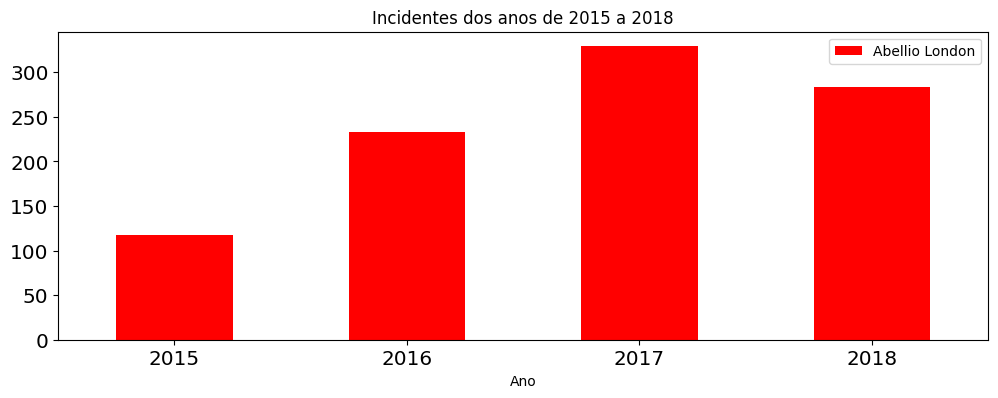

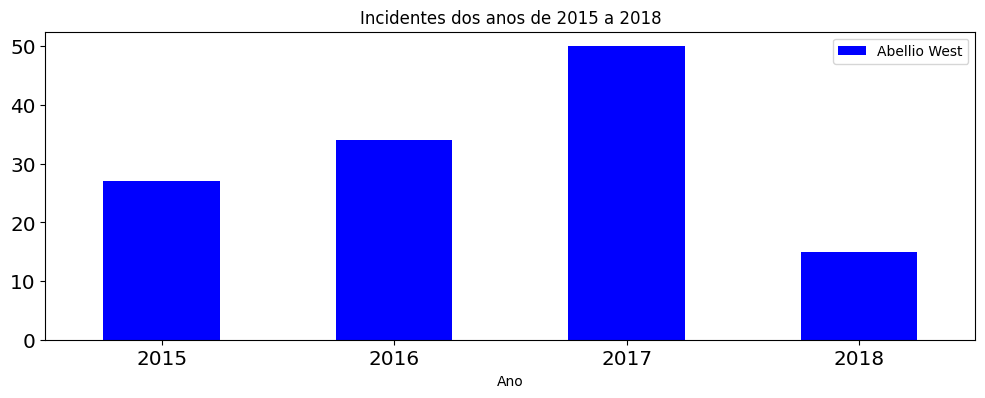

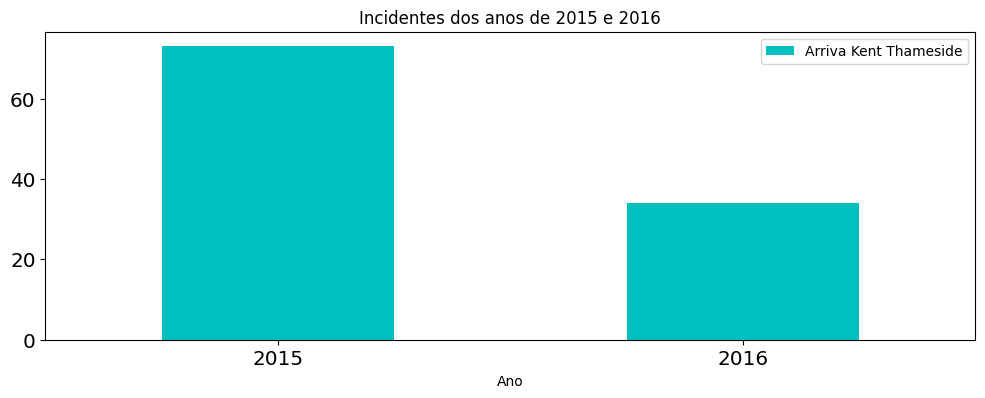

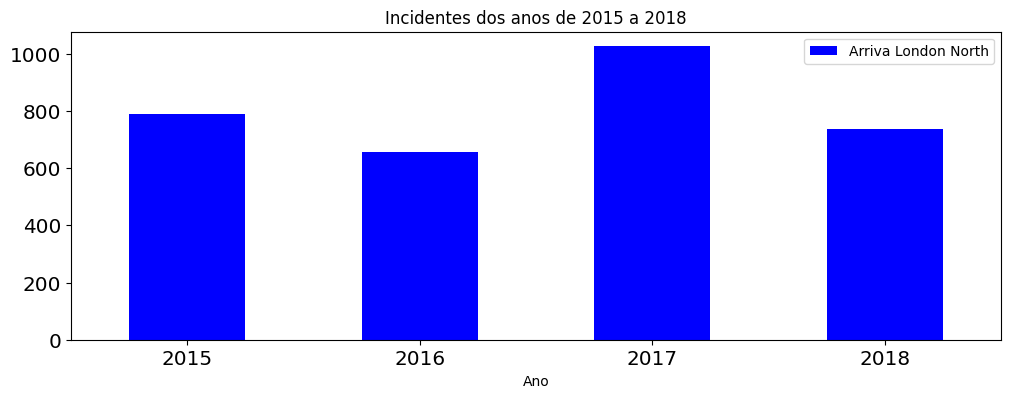

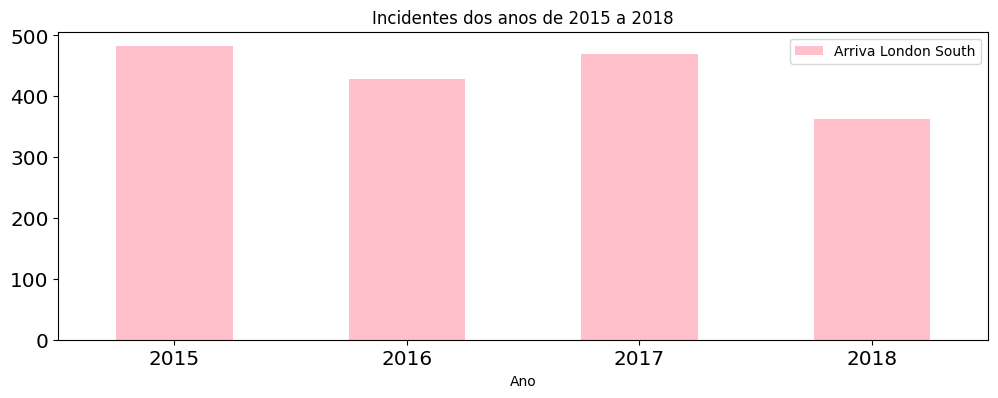

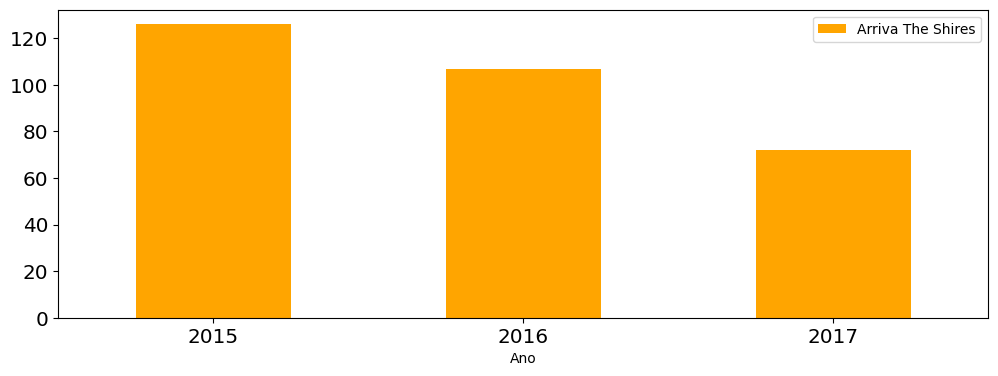

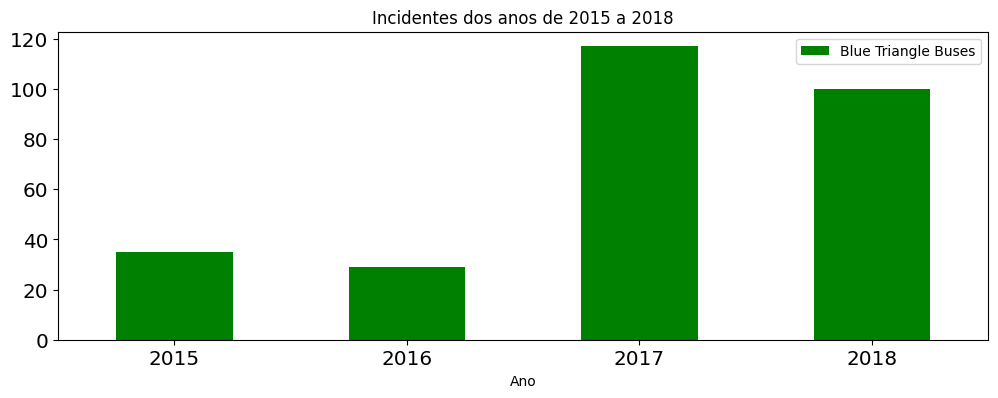

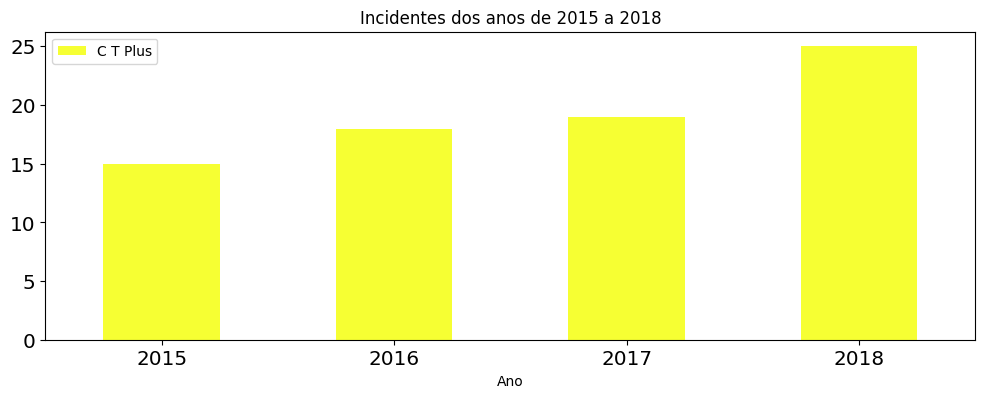

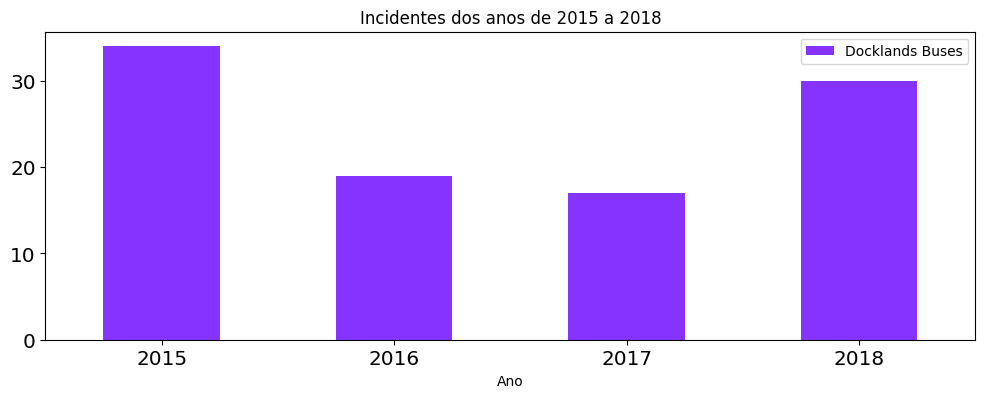

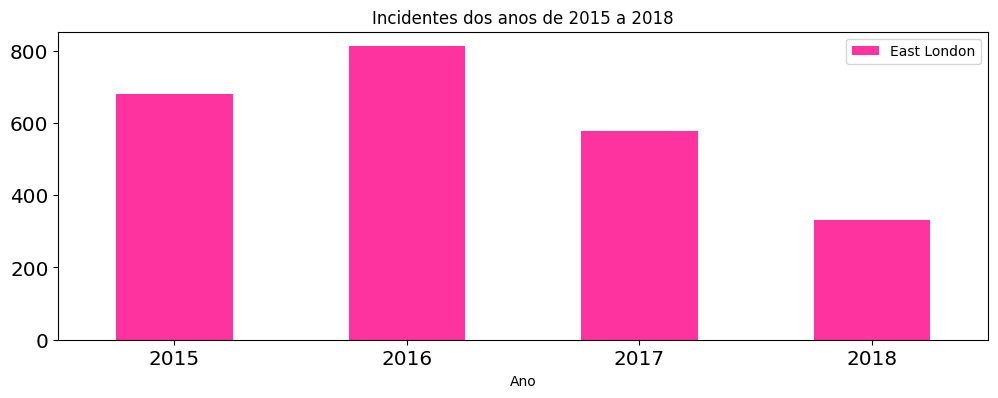

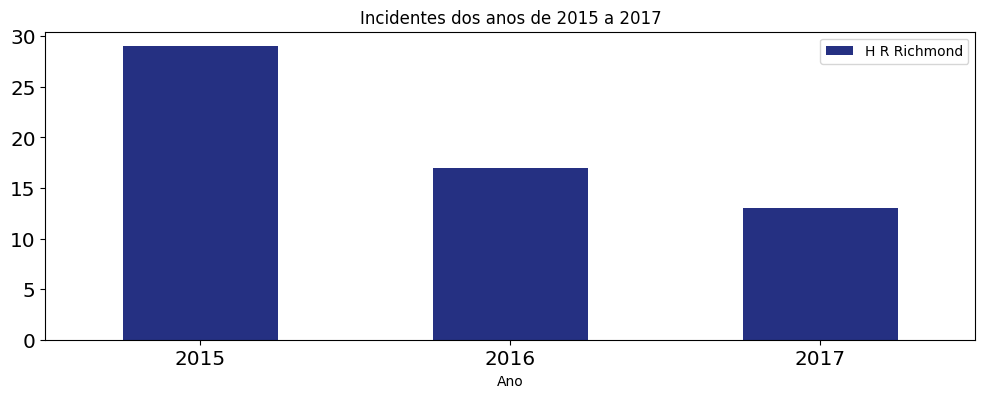

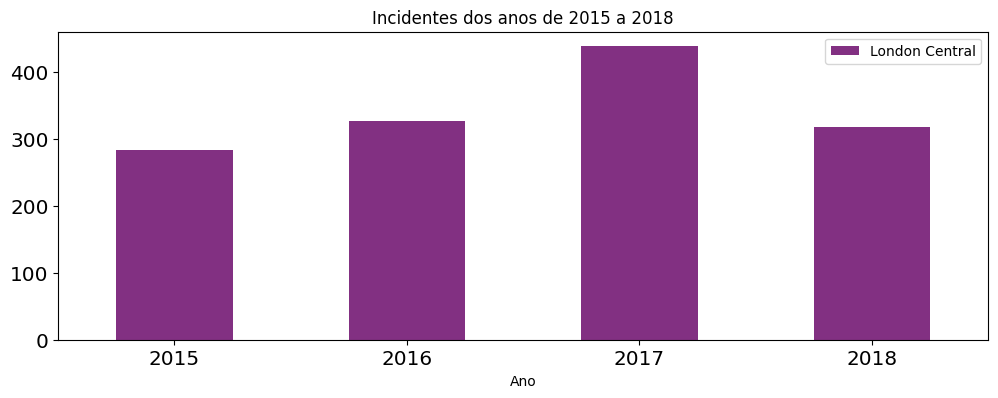

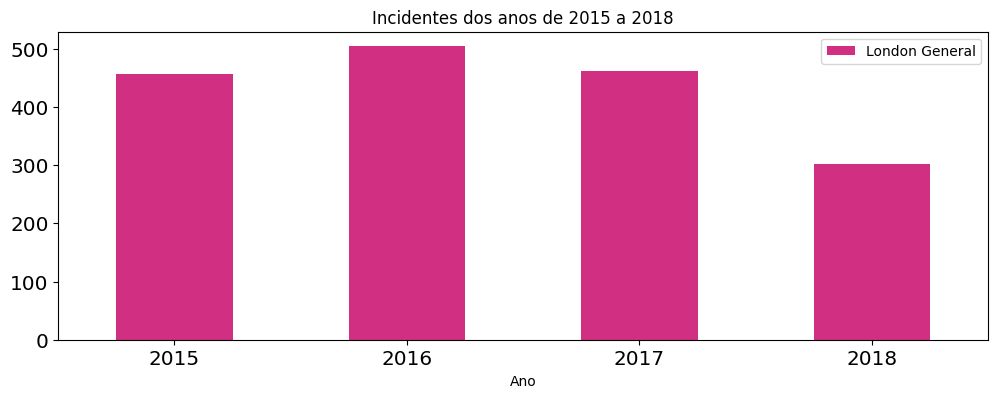

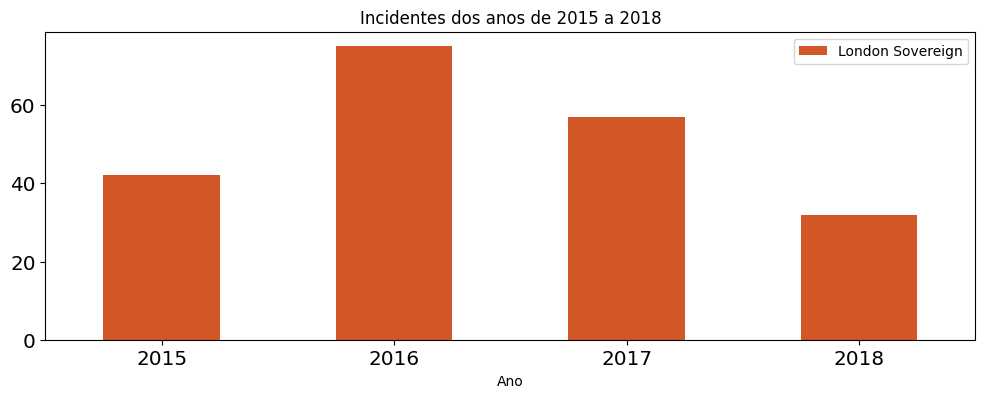

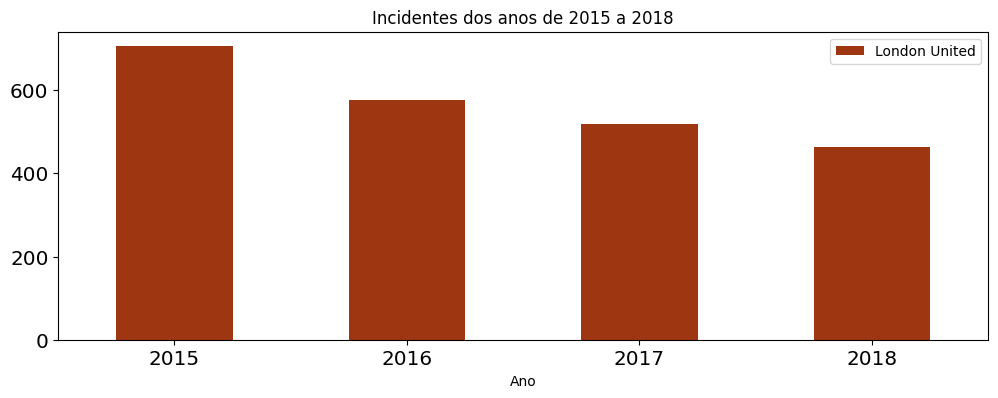

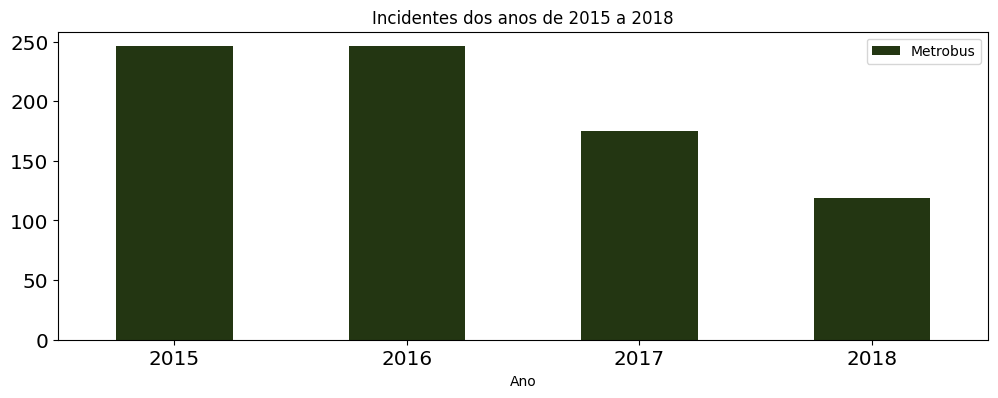

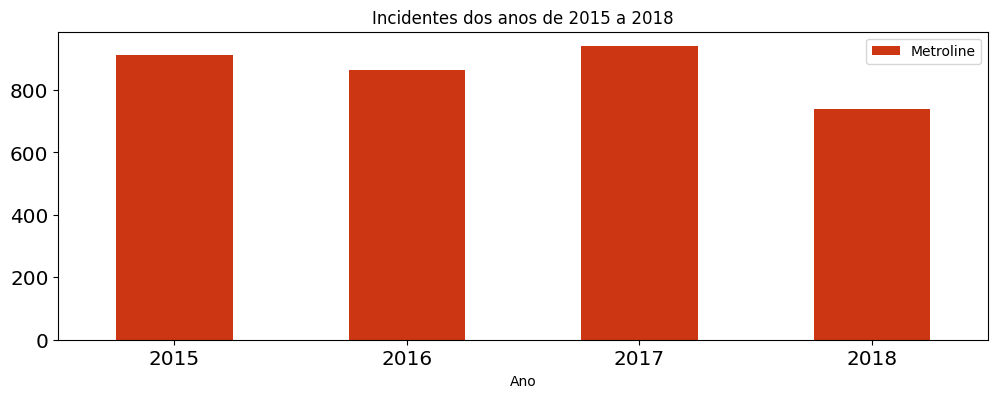

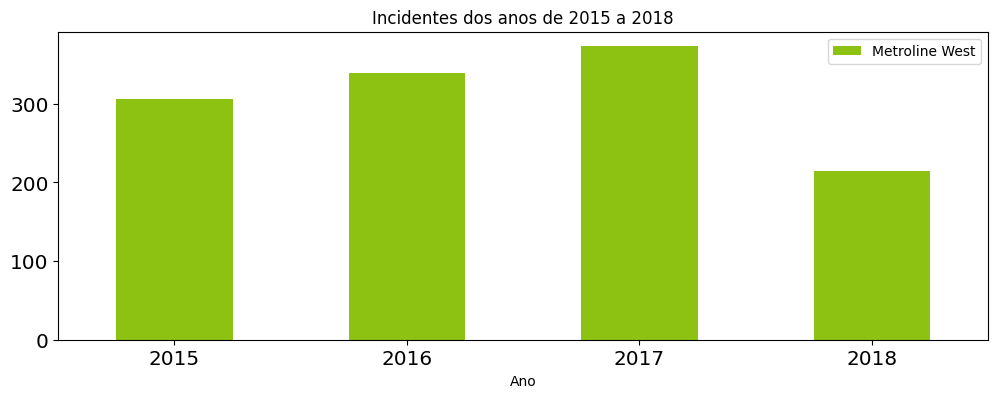

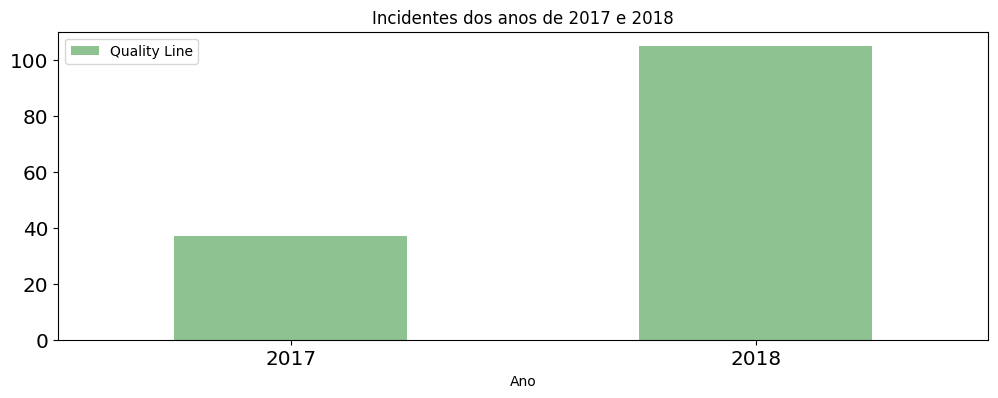

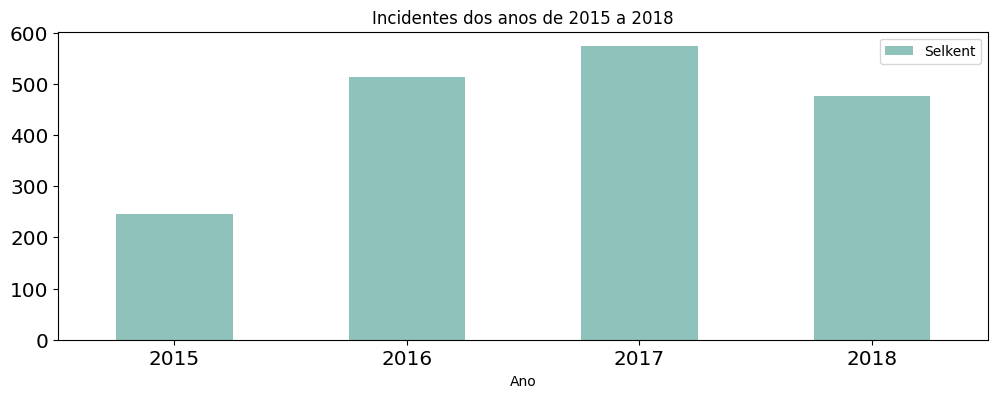

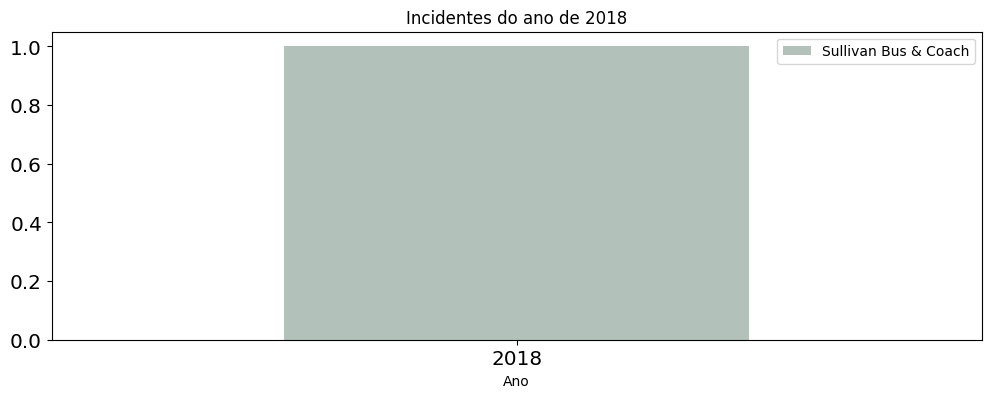

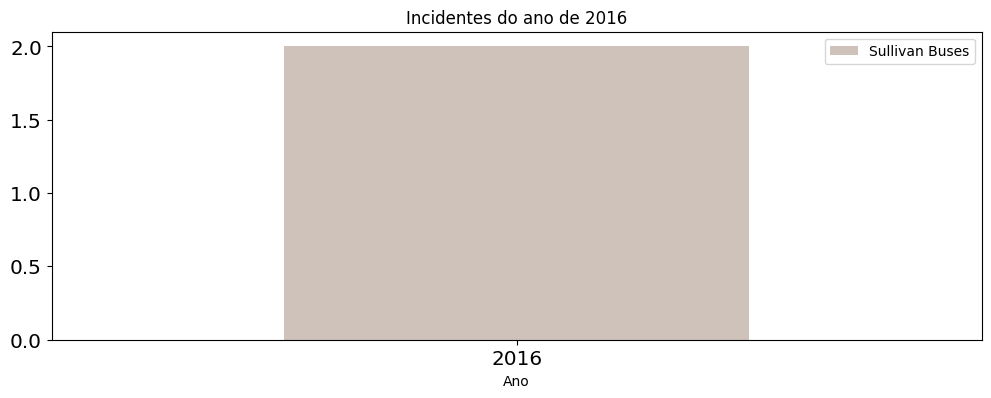

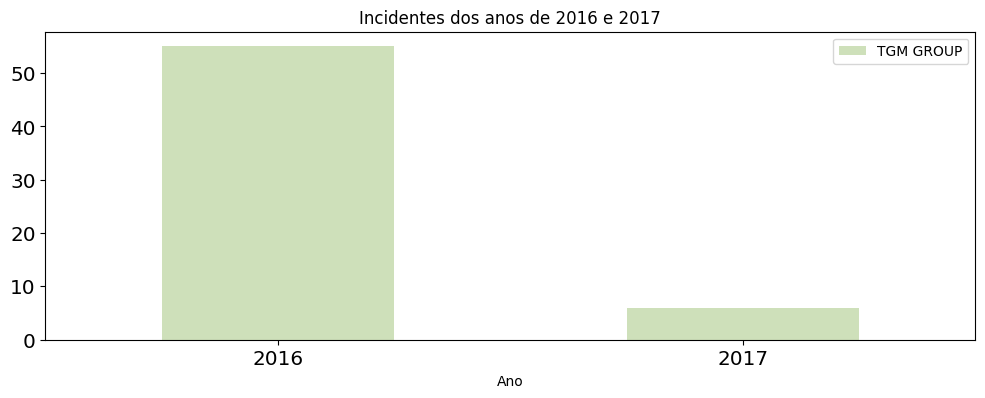

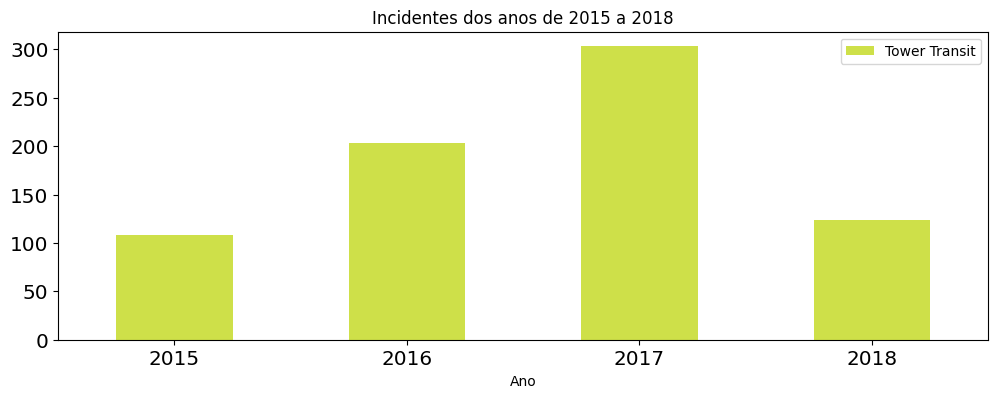

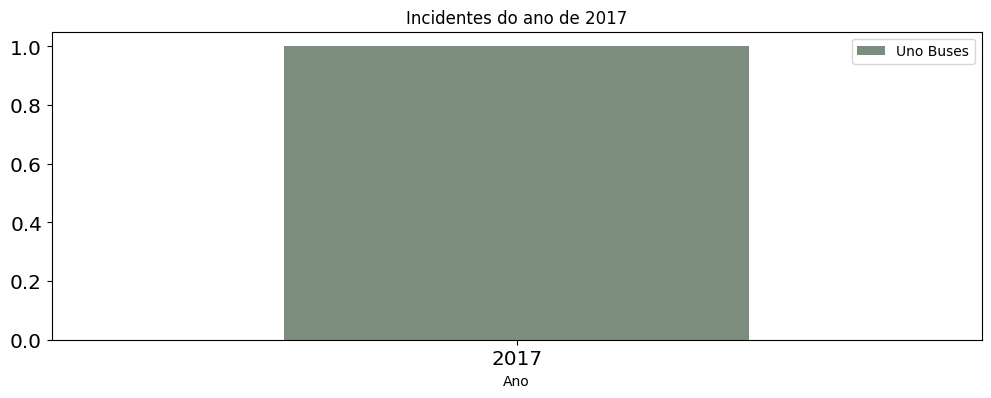

In [39]:
# Pergunta 9- Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
# Resposta 9 VIA GRAFICO
df9.iloc[0:4].plot(x='Ano',y='Quantidade', kind='bar', label = 'Abellio London', color = 'red')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[4:8].plot(x='Ano',y='Quantidade', kind='bar', label = 'Abellio West', color = 'blue')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[8:10].plot(x='Ano',y='Quantidade', kind='bar', label = 'Arriva Kent Thameside', color = 'c')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 e 2016')
plt.show()
df9.iloc[10:14].plot(x='Ano',y='Quantidade', kind='bar', label = 'Arriva London North', color = 'b')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[14:18].plot(x='Ano',y='Quantidade', kind='bar', label = 'Arriva London South', color = 'pink')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[18:21].plot(x='Ano',y='Quantidade', kind='bar', label = 'Arriva The Shires', color = 'orange')
plt.xticks(rotation=0)
plt.show()
df9.iloc[21:25].plot(x='Ano',y='Quantidade', kind='bar', label = 'Blue Triangle Buses', color = 'green')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[25:29].plot(x='Ano',y='Quantidade', kind='bar', label = 'C T Plus', color = '#F6FF33')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[29:33].plot(x='Ano',y='Quantidade', kind='bar', label = 'Docklands Buses', color = '#8633FF')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[33:37].plot(x='Ano',y='Quantidade', kind='bar', label = 'East London', color = '#FF339F')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[37:40].plot(x='Ano',y='Quantidade', kind='bar', label = 'H R Richmond', color = '#253082')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2017')
plt.show()
df9.iloc[40:44].plot(x='Ano',y='Quantidade', kind='bar', label = 'London Central', color = '#823082')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[44:48].plot(x='Ano',y='Quantidade', kind='bar', label = 'London General', color = '#d13082')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[48:52].plot(x='Ano',y='Quantidade', kind='bar', label = 'London Sovereign', color = '#d15727')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[52:56].plot(x='Ano',y='Quantidade', kind='bar', label = 'London United', color = '#9e3612')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[56:60].plot(x='Ano',y='Quantidade', kind='bar', label = 'Metrobus', color = '#233612')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[60:64].plot(x='Ano',y='Quantidade', kind='bar', label = 'Metroline', color = '#cc3612')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[64:68].plot(x='Ano',y='Quantidade', kind='bar', label = 'Metroline West', color = '#8ec212')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')
plt.show()
df9.iloc[68:70].plot(x='Ano',y='Quantidade', kind='bar', label = 'Quality Line', color = '#8ec290')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2017 e 2018')
plt.show()
df9.iloc[70:74].plot(x='Ano',y='Quantidade', kind='bar', label = 'Selkent', color = '#8ec2ba')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[74:75].plot(x='Ano',y='Quantidade', kind='bar', label = 'Sullivan Bus & Coach', color = '#b2c2ba')
plt.xticks(rotation=0)
plt.title('Incidentes do ano de 2018')
plt.show()
df9.iloc[75:76].plot(x='Ano',y='Quantidade', kind='bar', label = 'Sullivan Buses', color = '#cec2ba')
plt.xticks(rotation=0)
plt.title('Incidentes do ano de 2016')
plt.show()
df9.iloc[76:78].plot(x='Ano',y='Quantidade', kind='bar', label = 'TGM GROUP', color = '#cee0ba')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2016 e 2017')
plt.show()
df9.iloc[78:82].plot(x='Ano',y='Quantidade', kind='bar', label = 'Tower Transit', color = '#cee049')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 a 2018')          
plt.show()
df9.iloc[82:83].plot(x='Ano',y='Quantidade', kind='bar', label = 'Uno Buses', color = '#7c8d7e')
plt.xticks(rotation=0)
plt.title('Incidentes do ano de 2017')
plt.show()

In [40]:
#para operadores com somente 1 ou 2 anos vou apresentar a evolução em meses também
query = """
SELECT Mes,Ano, Operador, count(*) AS Quantidade
FROM df
GROUP BY Operador, Ano, Mes
#ORDER BY count(*) DESC
;
"""
df9mes = sqldf.run(query)
df9mes.head()

,Mes,Ano,Operador,Quantidade
0,1,2015,Abellio London,11
1,2,2015,Abellio London,6
2,3,2015,Abellio London,7
3,4,2015,Abellio London,9
4,5,2015,Abellio London,11


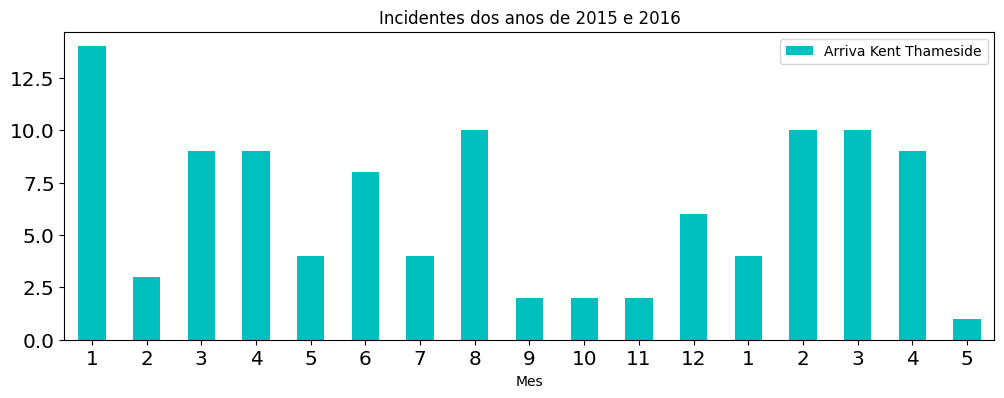

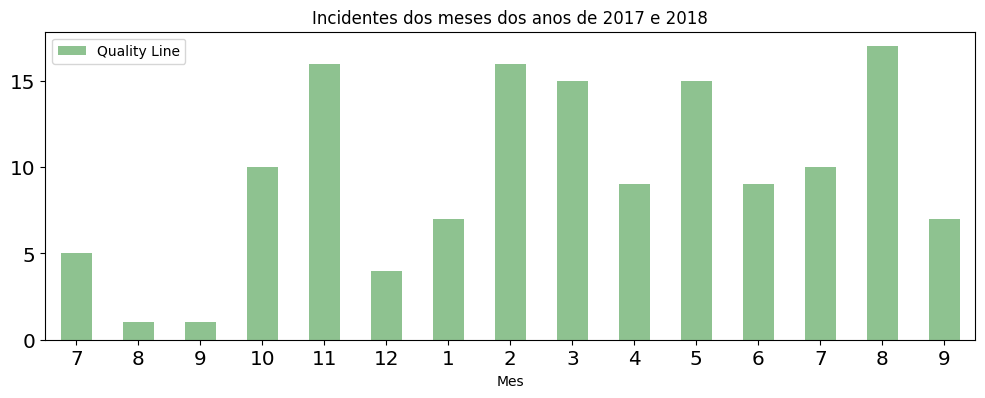

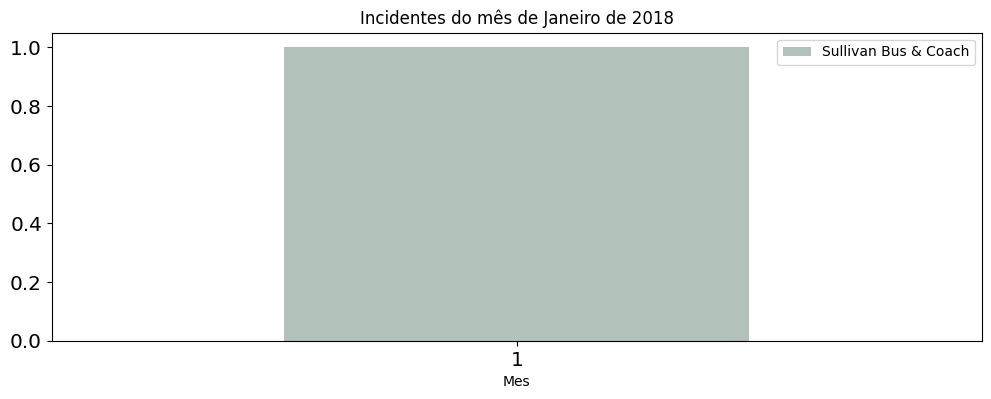

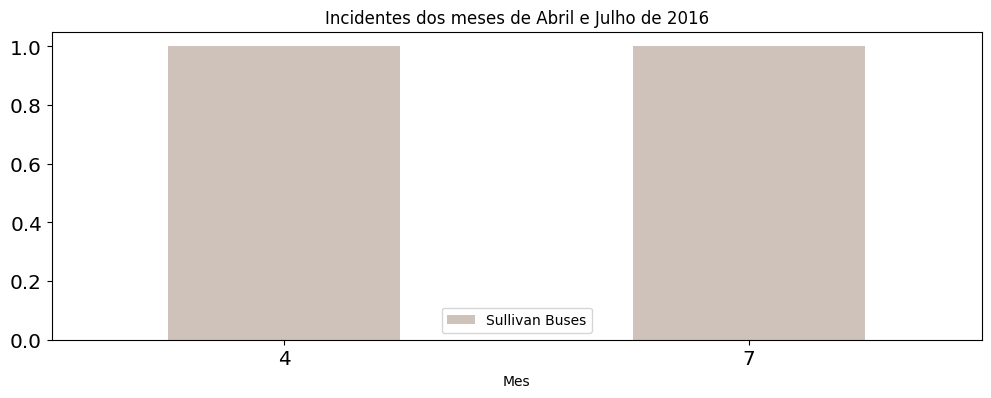

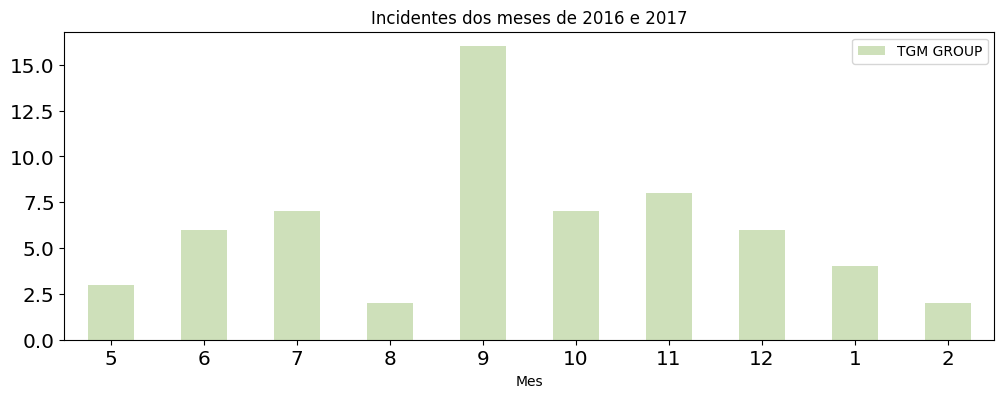

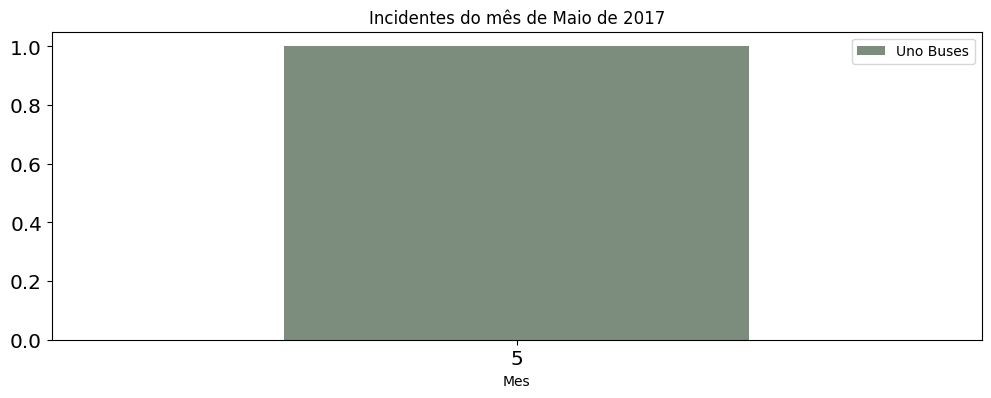

In [41]:
df9mes.iloc[85:102].plot(x='Mes',y='Quantidade', kind='bar', label = 'Arriva Kent Thameside', color = 'c')
plt.xticks(rotation=0)
plt.title('Incidentes dos anos de 2015 e 2016')
plt.show()
df9mes.iloc[719:734].plot(x='Mes',y='Quantidade', kind='bar', label = 'Quality Line', color = '#8ec290')
plt.xticks(rotation=0)
plt.title('Incidentes dos meses dos anos de 2017 e 2018')
plt.show()
df9mes.iloc[777:778].plot(x='Mes',y='Quantidade', kind='bar', label = 'Sullivan Bus & Coach', color = '#b2c2ba')
plt.xticks(rotation=0)
plt.title('Incidentes do mês de Janeiro de 2018')
plt.show()
df9mes.iloc[778:780].plot(x='Mes',y='Quantidade', kind='bar', label = 'Sullivan Buses', color = '#cec2ba')
plt.xticks(rotation=0)
plt.title('Incidentes dos meses de Abril e Julho de 2016')
plt.show()
df9mes.iloc[780:790].plot(x='Mes',y='Quantidade', kind='bar', label = 'TGM GROUP', color = '#cee0ba')
plt.xticks(rotation=0)
plt.title('Incidentes dos meses de 2016 e 2017')
plt.show()
df9mes.iloc[835:836].plot(x='Mes',y='Quantidade', kind='bar', label = 'Uno Buses', color = '#7c8d7e')
plt.xticks(rotation=0)
plt.title('Incidentes do mês de Maio de 2017')
plt.show()


<h1>PERGUNTA 10</h1>

In [42]:
# Pergunta 10- Qual o tipo de incidente mais comum com ciclistas?
# Resposta 10 VIA QUERY
# A colisão é o incidente mais comum entre os ciclistas  
query = """
SELECT Tipo_Evento_Incidente, count(*) AS Quantidade
FROM df
WHERE Categoria_Vitima = 'Cyclist'
GROUP BY Tipo_Evento_Incidente
ORDER BY count(*) DESC
;
"""
df10 = sqldf.run(query)
df10

,Tipo_Evento_Incidente,Quantidade
0,Collision Incident,256
1,Personal Injury,8
2,Slip Trip Fall,7
3,Onboard Injuries,4


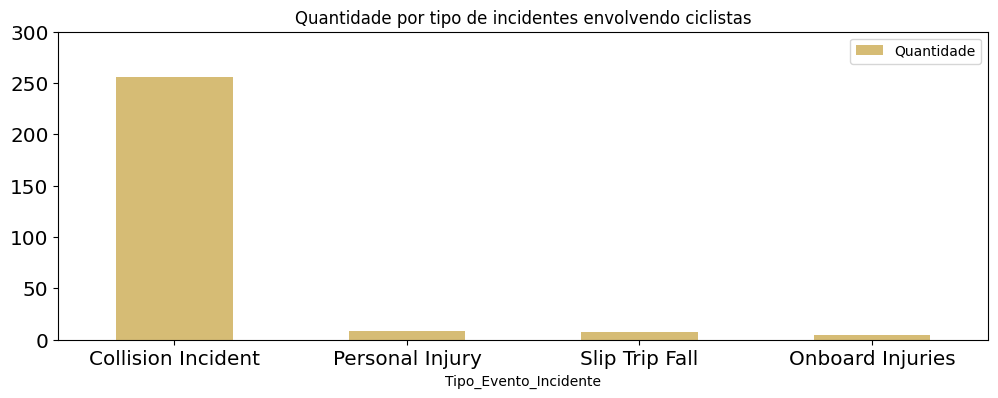

In [43]:
# Pergunta 10- Qual o tipo de incidente mais comum com ciclistas?
# Resposta 10 VIA GRAFICO
# A colisão é o incidente mais comum entre os ciclistas  
df10.plot(x='Tipo_Evento_Incidente',y='Quantidade', kind='bar', color = '#d6bc75')
plt.title('Quantidade por tipo de incidentes envolvendo ciclistas')
plt.yticks(np.arange(0, 350, step=50))
plt.xticks(rotation=0)
plt.show()